# Tensorflow 102 - 이미지 분류(CNN)
## 12강 다섯번째 딥러닝 완성 - Lenet-5 (실습)
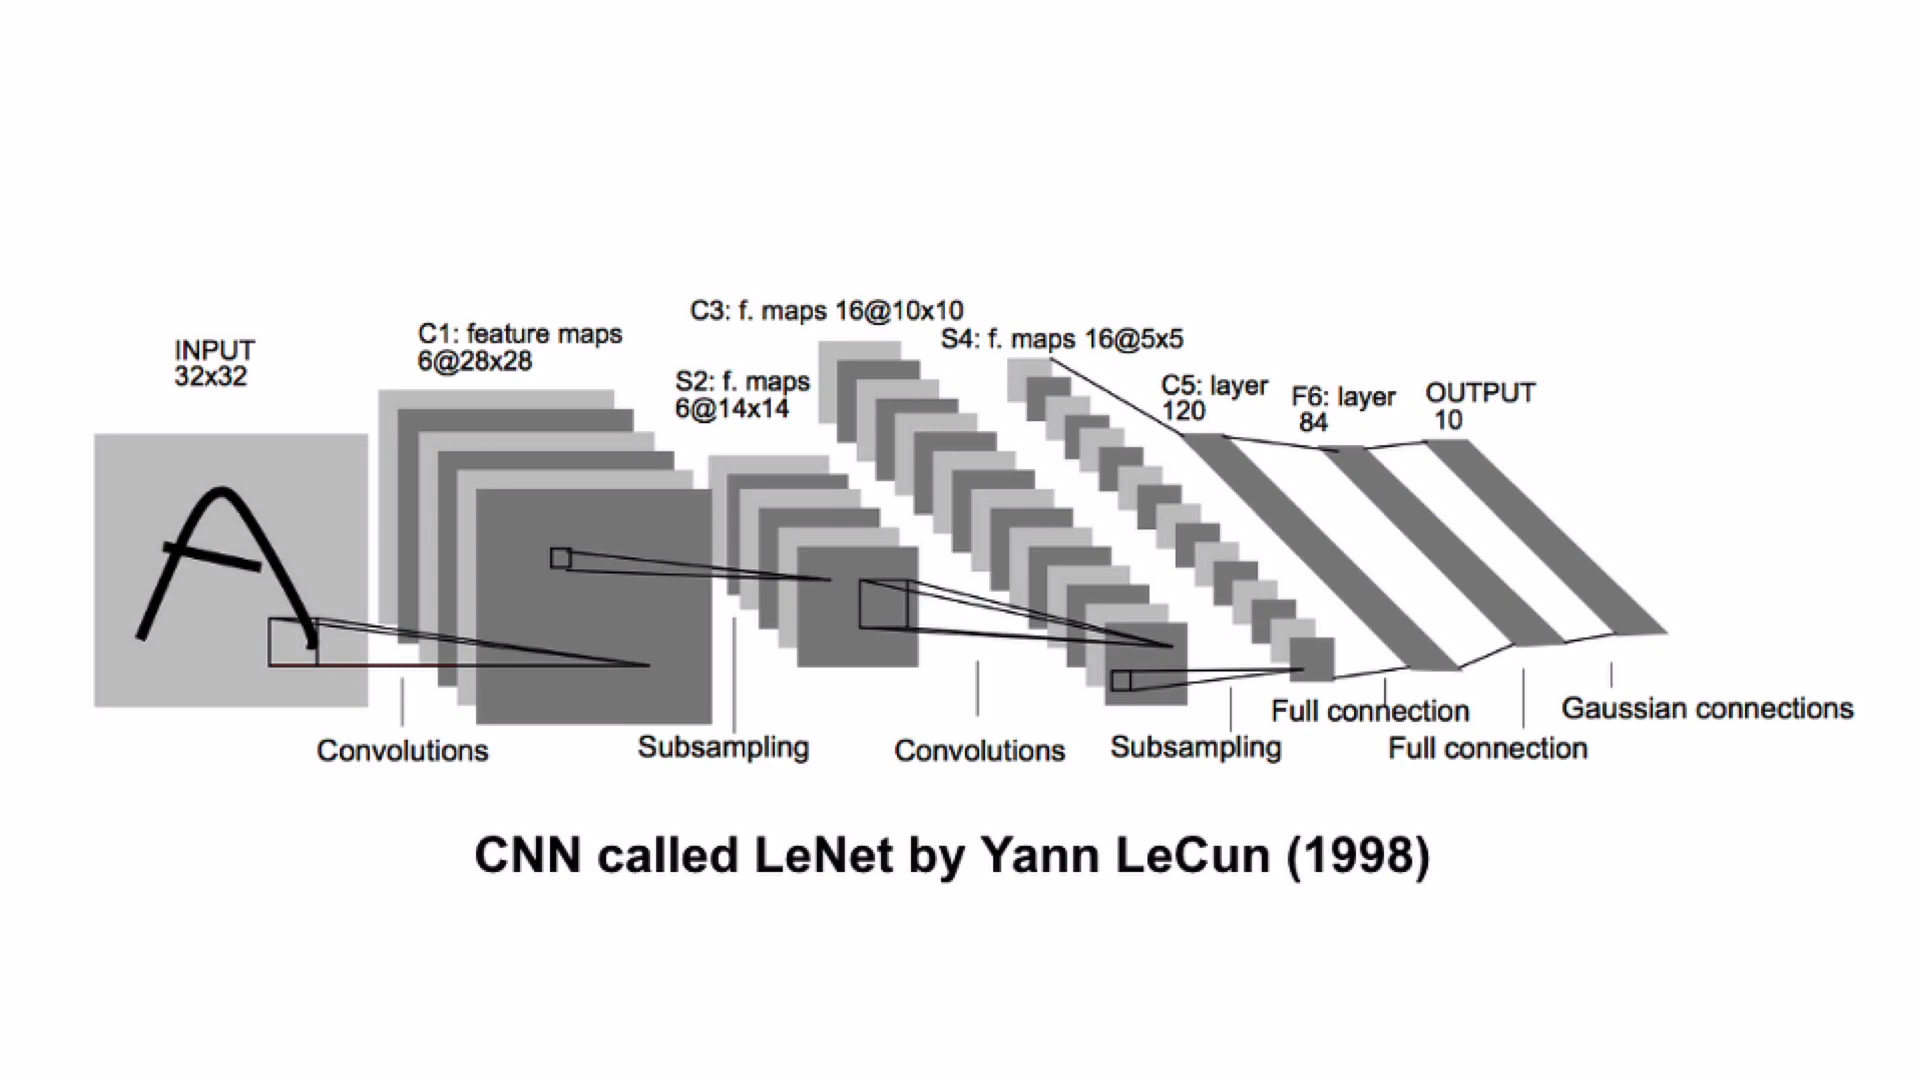

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
# 데이터 준비
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
독립 = 독립.reshape(60000, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


In [5]:
# 모델 완성
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X) #픽셀 크기를 줄이지 않기 위해 padding='same'
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [6]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 5ms/step - loss: 0.3785 - accuracy: 0.9298
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0969 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0812 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0713 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0706 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0748 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0704 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0699 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0721 - accuracy: 0.9849
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

## Cifar 10

In [9]:
# 데이터 준비
(독립, 종속), _ = tf.keras.datasets.cifar10.load_data()
print(독립.shape, 종속.shape)

종속 = pd.get_dummies(종속.reshape(50000)) # 1차원 형태로 reshape 해준 후 원핫인코딩 해야함
print(독립.shape, 종속.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [10]:
# 모델 완성
X = tf.keras.layers.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [11]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9797 - accuracy: 0.3109
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6106 - accuracy: 0.4193
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5194 - accuracy: 0.4611
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4719 - accuracy: 0.4797
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4358 - accuracy: 0.4970
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4019 - accuracy: 0.5106
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3824 - accuracy: 0.5186
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3698 - accuracy: 0.5245
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3516 - accuracy: 0.5342
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.34

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               4812